# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## Importing necessary libraries and data

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

EasyVisa = pd.read_csv(io.BytesIO(uploaded['EasyVisa.csv']))

In [ ]:
df=EasyVisa.copy()

In [ ]:
# returns the first 5 rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 25480 rows and 12 columns.


In [ ]:
# Checking the statistical summary of the data, "include='all'" will bring in also categorical columns and ".T" will change colums to rows and rows to columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:

* Many visa application come from Asia
* Most people have Bachelor degree
* Minimun number of employees is -26, this can be considered as an error 

In [ ]:
# Checking if there are duplicate rows
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.


In [ ]:
def histogram_boxplot(
    data,
    feature,
    figsize=(15, 10),
    kde=False,
    bins=None,
    ):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    (f2, (ax_box2, ax_hist2)) = plt.subplots(nrows=2, sharex=True,
            gridspec_kw={'height_ratios': (0.25, 0.75)},
            figsize=figsize)  # Number of rows of the subplot grid= 2
                              # x-axis will be shared among all subplots

       # creating the 2 subplots

    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True,
                color='violet')

       # boxplot will be created and a triangle will indicate the mean value of the column

    (sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2,
     bins=bins) if bins else sns.histplot(data=data, x=feature,
     kde=kde, ax=ax_hist2))

       # For histogram

    ax_hist2.axvline(data[feature].mean(), color='green', linestyle='--'
                     )

       # Add mean to the histogram

    ax_hist2.axvline(data[feature].median(), color='black',
                     linestyle='-')


       # Add median to the histogram

In [ ]:
def labeled_barplot(
    data,
    feature,
    perc=False,
    n=None,
    ):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette='Paired',
                       order=data[feature].value_counts().index[:n])

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(100 * p.get_height() / total)
        else:

               # percentage of each class of the category

            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points',
            )

           # annotate the percentage

    plt.show()  # show the plot

  

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    (fig, axs) = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title('Distribution of target for target='
                        + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='teal',
        stat='density',
        )

    axs[0, 1].set_title('Distribution of target for target='
                        + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='orange',
        stat='density',
        )

    axs[1, 0].set_title('Boxplot w.r.t target')
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0],
                palette='gist_rainbow')

    axs[1, 1].set_title('Boxplot (without outliers) w.r.t target')
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette='gist_rainbow',
        )

    plt.tight_layout()
    plt.show()

  

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target],
                       margins=True).sort_values(by=sorter,
            ascending=False)
    print (tab1)
    print ('-' * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index'
                      ).sort_values(by=sorter, ascending=False)
    tab.plot(kind='bar', stacked=True, figsize=(count + 5, 6))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


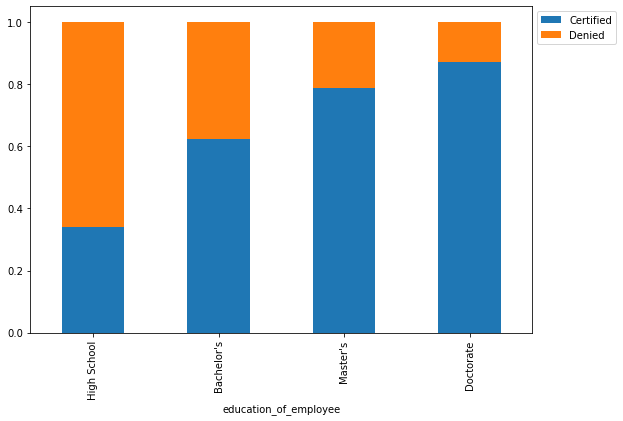

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

Observation:

* As the level of education increases the chances of getting a visa increase too

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


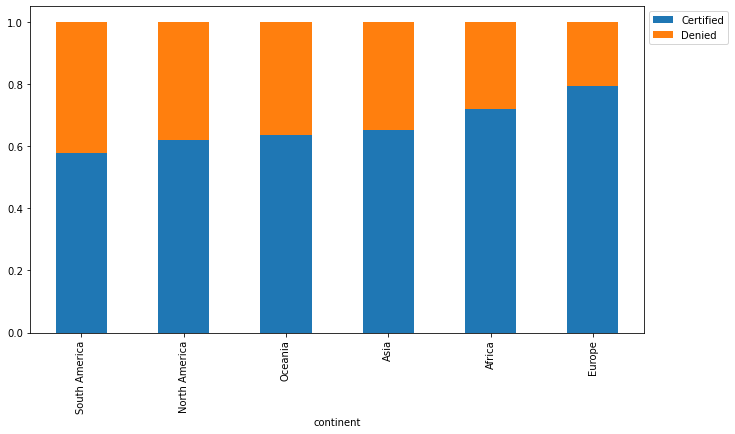

In [ ]:
stacked_barplot(df, "continent", "case_status")

Observation:

* People from Europe have more hance of getting a visa , followed by Africans

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


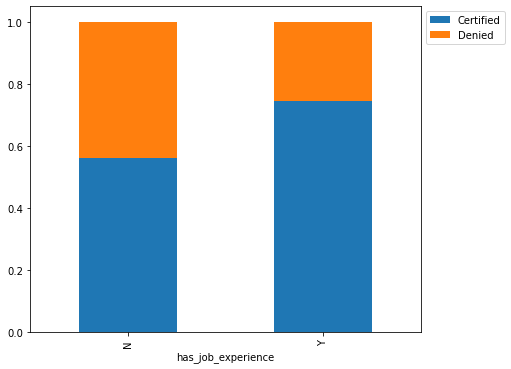

In [ ]:
stacked_barplot(df, "has_job_experience", "case_status")


Observation:

* People with job experience have more chance of getting avisa

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


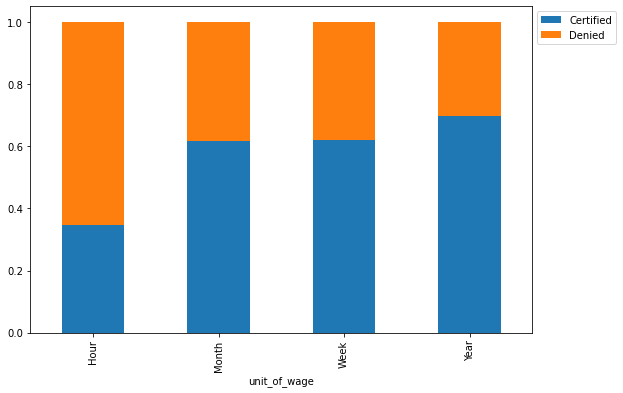

In [ ]:
stacked_barplot(df, "unit_of_wage", "case_status")

Observation:

* Jobs with year as unit of wage increases the chance of getting a visa

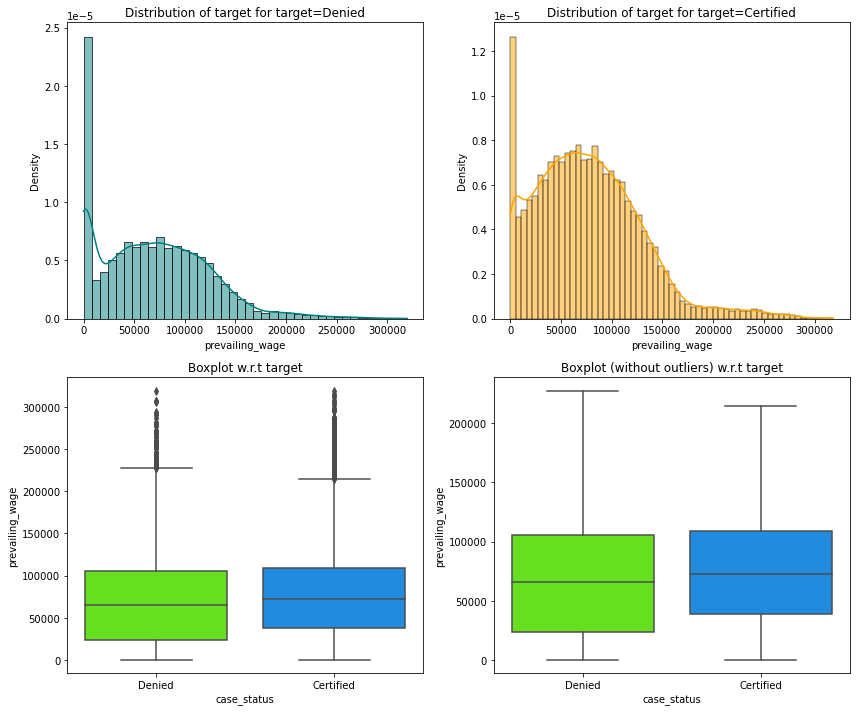

In [ ]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

Observation:

* Jobs with prevailling wage of 70,000 and more guaranty the visa obtantion

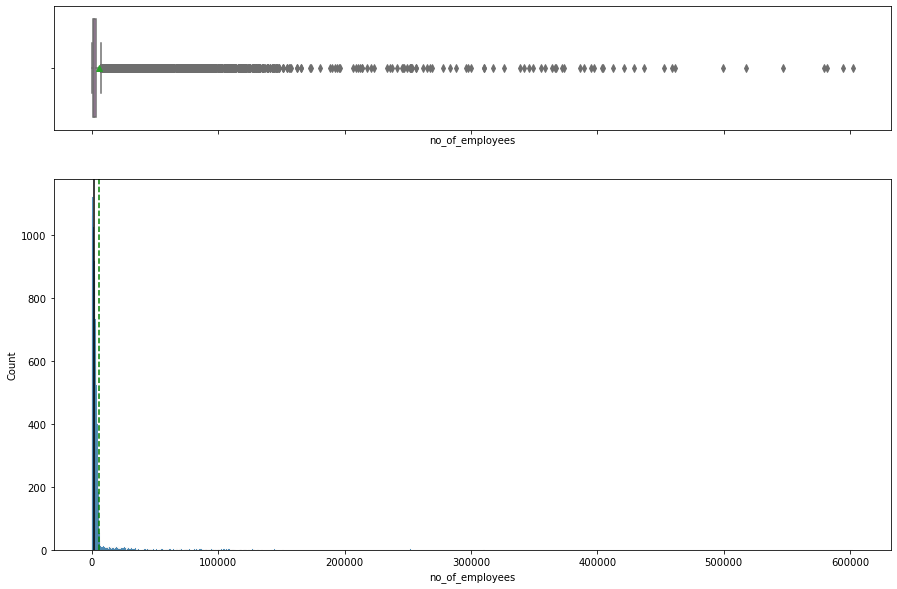

In [ ]:
histogram_boxplot(df,'no_of_employees')

Observation:

* number of employees distribution is right skewed
* Outliers in the upper side

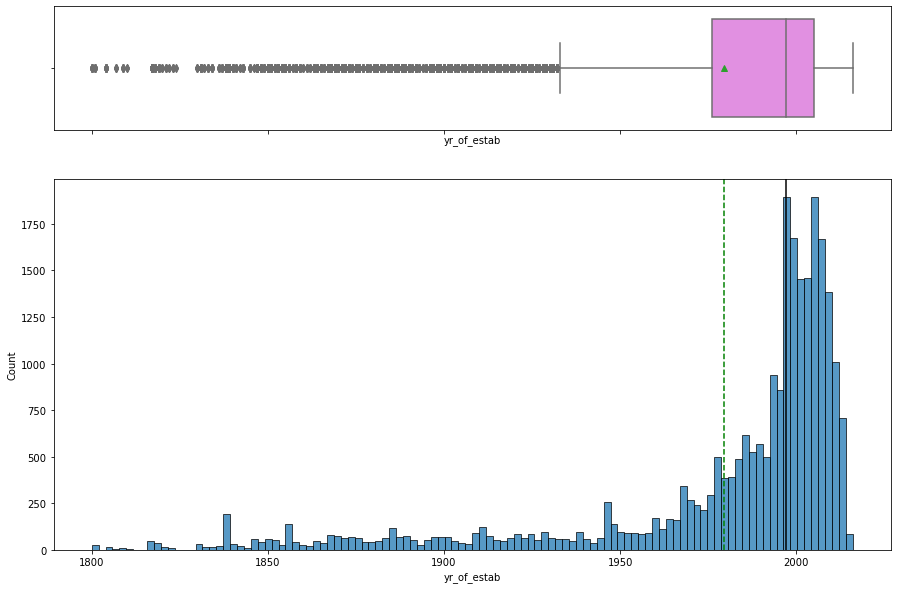

In [ ]:
histogram_boxplot(df,'yr_of_estab')

Observation:

* Year of estab distribution is left skewed
* Outliers in the lower side

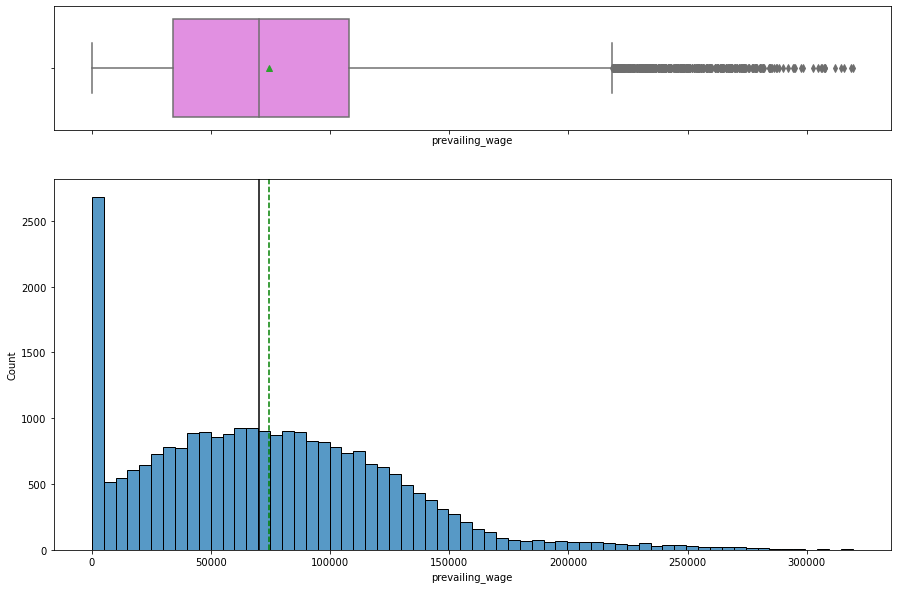

In [ ]:
histogram_boxplot(df,'prevailing_wage')

Observation:

* Prevailling wage is right skewed
* Outliers in the upper side

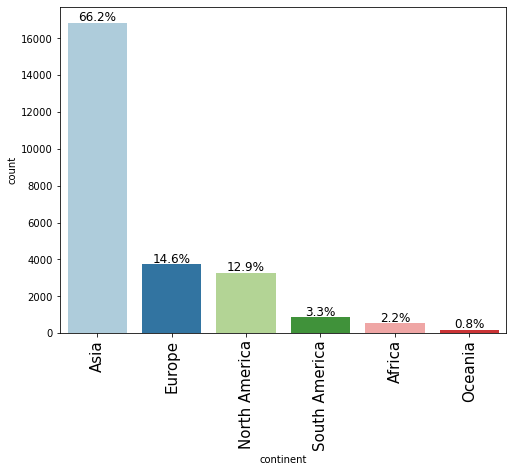

In [ ]:
labeled_barplot(df,'continent',perc=True)

Observation:

* Most visa applications are from Asia, followed by Europe and North America

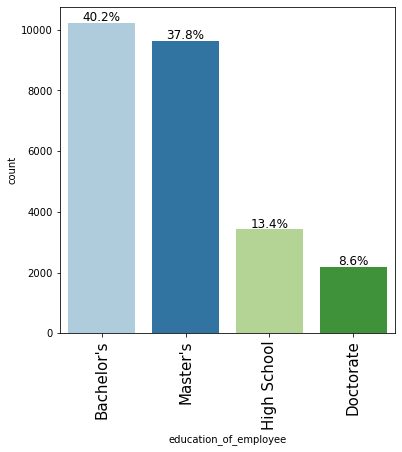

In [ ]:
labeled_barplot(df,'education_of_employee',perc=True)

Observation:

* Most people have Bachelor degree, follwed by Masters

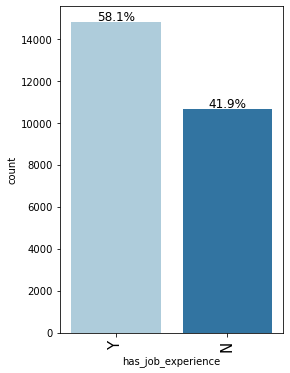

In [ ]:
labeled_barplot(df,'has_job_experience',perc=True)

Observation:

* Most people have job experience

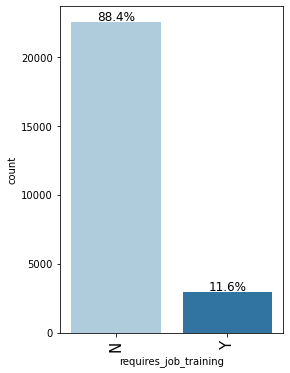

In [ ]:
labeled_barplot(df,'requires_job_training',perc=True)

Observation:

* 88.4 of jobs do not require job training

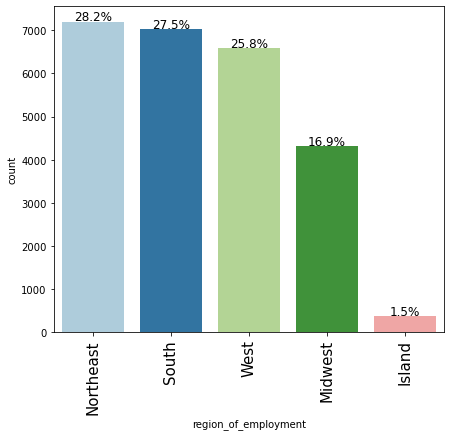

In [ ]:
labeled_barplot(df,'region_of_employment',perc=True)

Observation:

* Most jobs come from Northeast, followed by South and West

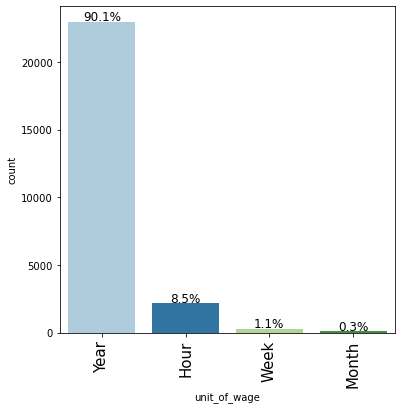

In [ ]:
labeled_barplot(df,'unit_of_wage',perc=True)

Observation:

* 91.1 of jobs have year as unit of wage

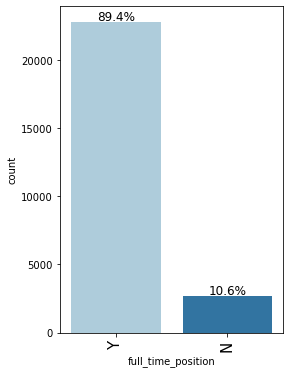

In [ ]:
labeled_barplot(df,'full_time_position',perc=True)

Observation:

* 89.4 % of jobs are full time position

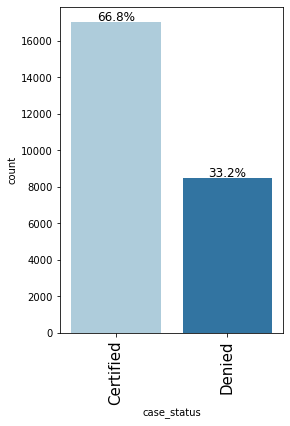

In [ ]:
labeled_barplot(df,'case_status',perc=True)

Observation:

* 66.8% of application are certified
* This also indicate that our data in imbalanced, which we should treat accordingly

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192
------------------------------------------------------------------------------------------------------------------------


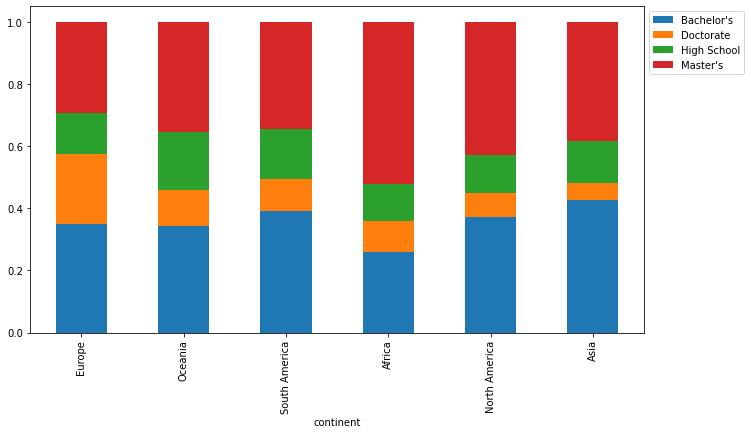

In [ ]:
stacked_barplot(df, "continent", "education_of_employee")

Observation:

* Europe has more people with doctorate
* Africa has more people with Masters
* Oceania has more people with High School
* Asia has more people with Bachelors

has_job_experience      N      Y    All
continent                              
All                 10678  14802  25480
Asia                 7071   9790  16861
Europe               1576   2156   3732
North America        1348   1944   3292
South America         377    475    852
Africa                217    334    551
Oceania                89    103    192
------------------------------------------------------------------------------------------------------------------------


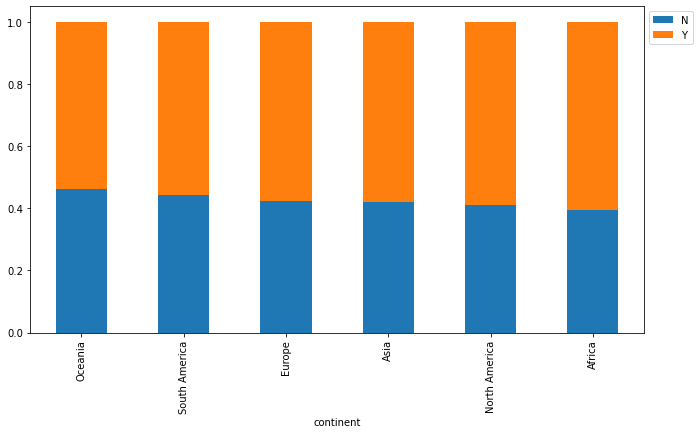

In [ ]:
stacked_barplot(df, "continent", "has_job_experience")

Observation:

* Most people with job experience come from Africa ,followed by North America

region_of_employment  Island  Midwest  Northeast  South  West    All
continent                                                           
All                      375     4307       7195   7017  6586  25480
Asia                     226     3371       4589   4805  3870  16861
North America             82      392       1114    870   834   3292
Europe                    32      303        965    973  1459   3732
South America             23      111        266    223   229    852
Africa                     8       92        212    102   137    551
Oceania                    4       38         49     44    57    192
------------------------------------------------------------------------------------------------------------------------


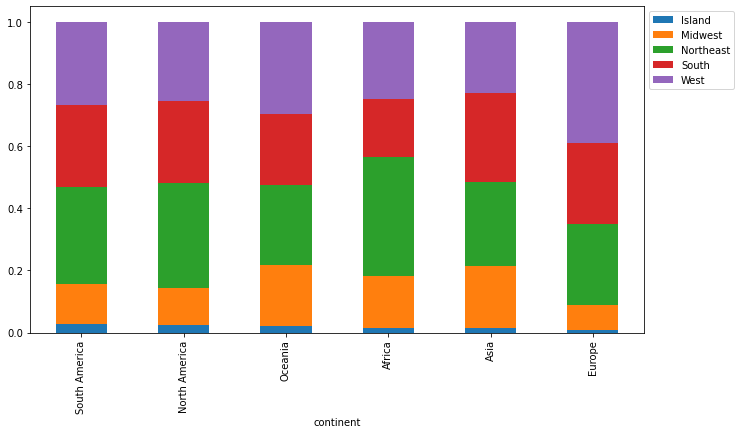

In [ ]:
stacked_barplot(df, "continent", "region_of_employment")

Observation:

* Most Africans go to Northeast
* Most South Americans go to Island
* People from Oceania prefer The Midwest
* People from Europe prefer the West

unit_of_wage   Hour  Month  Week   Year    All
continent                                     
All            2157     89   272  22962  25480
Asia           1311     58   154  15338  16861
North America   495     17    75   2705   3292
Europe          140      7    17   3568   3732
Africa           36      3     8    504    551
Oceania          18      2     4    168    192
South America   157      2    14    679    852
------------------------------------------------------------------------------------------------------------------------


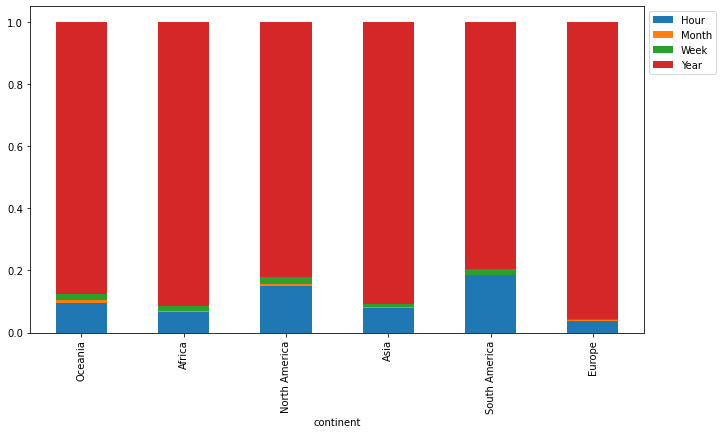

In [ ]:
stacked_barplot(df, "continent", "unit_of_wage")

Observation:

* South Americans prefer hour as unit of wage
* Europians prefer year as unit of wage

full_time_position     N      Y    All
continent                             
All                 2707  22773  25480
Asia                1941  14920  16861
North America        571   2721   3292
Europe               115   3617   3732
Africa                31    520    551
South America         31    821    852
Oceania               18    174    192
------------------------------------------------------------------------------------------------------------------------


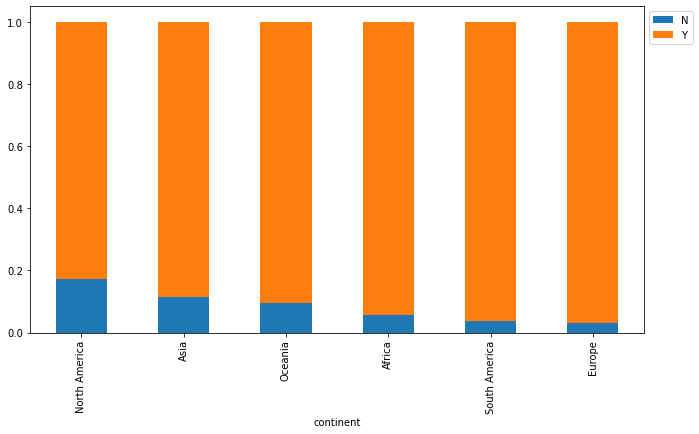

In [ ]:
stacked_barplot(df, "continent", "full_time_position")

Observation:

* Full time position is mostly applied by Europians, followed by South Americans

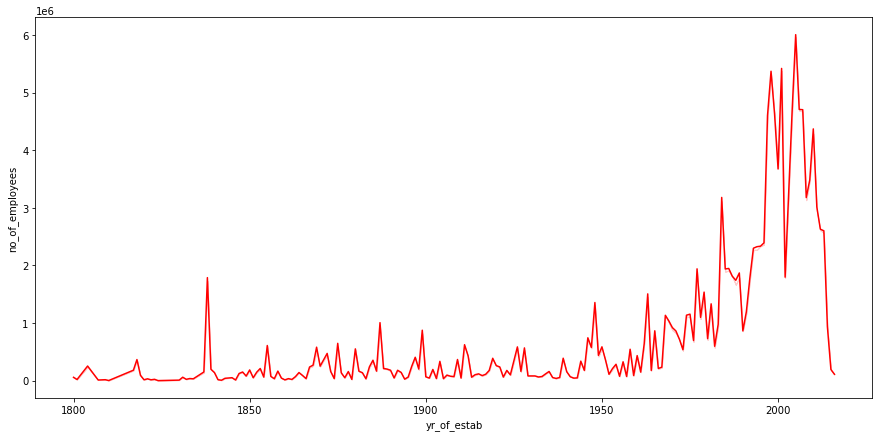

In [ ]:
cats = df.yr_of_estab.unique().tolist()
df.arrival_month = pd.Categorical(df.yr_of_estab, ordered=True,
                                  categories=cats)

plt.figure(figsize=(15, 7))
sns.lineplot(
    data=df,
    x='yr_of_estab',
    y='no_of_employees',
    ci=False,
    color='red',
    estimator='sum',
    )
plt.ylabel('no_of_employees')
plt.xlabel('yr_of_estab')
plt.show()

Observation:

* There is a peak in number of employees in the years 2002,2003

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


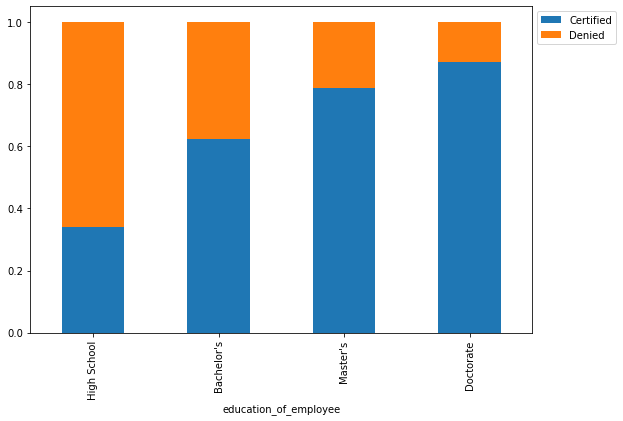

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

Observation:

* higher educations increase the chance of getting a visa

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


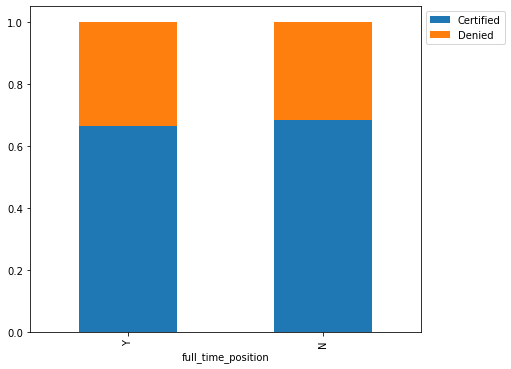

In [ ]:
stacked_barplot(df, "full_time_position", "case_status")

Observation:

* There is no much difference between full time and part time postion in the chance of getting a visa

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


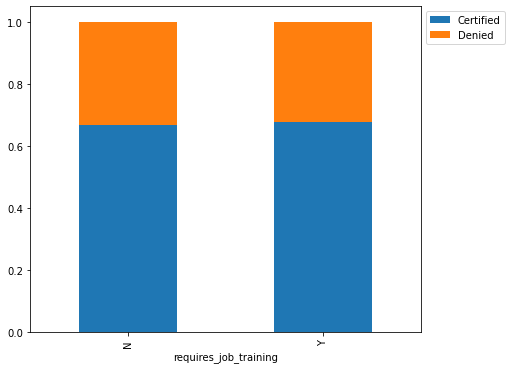

In [ ]:
stacked_barplot(df,"requires_job_training", "case_status")

Observation:

* There is no much difference in the chance of getting a visa when the job require experience or not

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


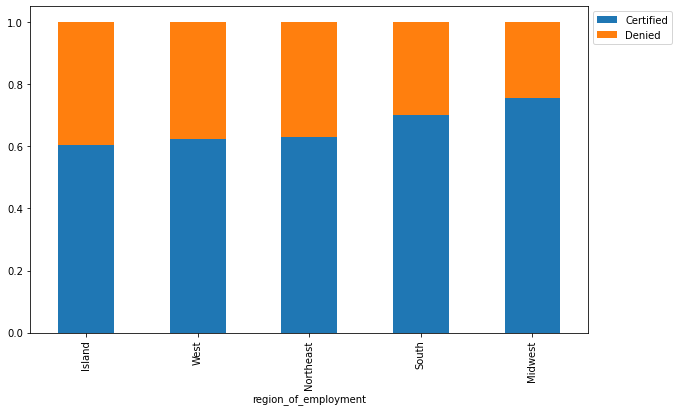

In [ ]:
stacked_barplot(df, "region_of_employment", "case_status")

Observation:

* Jobs from Midwest give higher chance of getting a visa followed by jobs from south

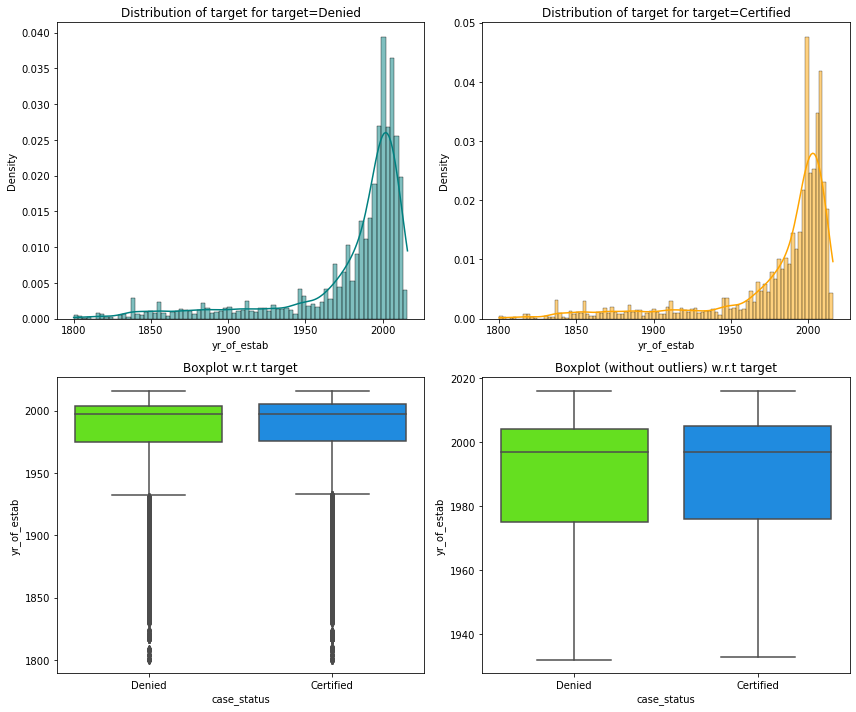

In [ ]:
distribution_plot_wrt_target(df, "yr_of_estab", "case_status")

Observation:

* yr_of_estab of the employer does not impact the approval of visa

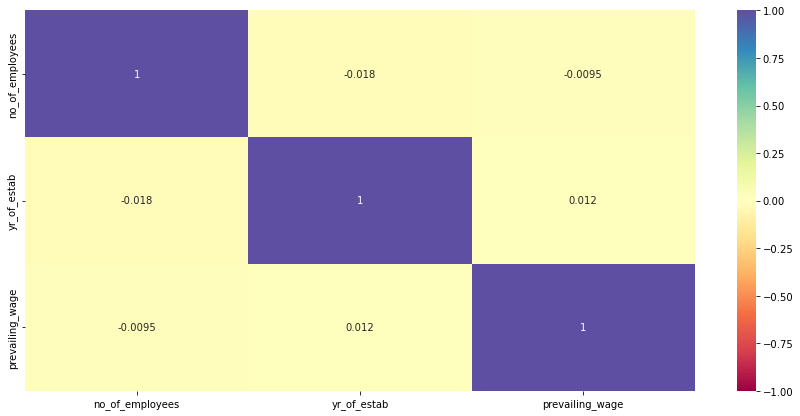

In [ ]:
# Heatmap to check the correlation between numerical data

plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Observation:

* There is no significant correlation between numerical variables

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
df1=df.copy()

In [ ]:
# Checking if there are missing values
df1.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

Observation:

* There are no missing values

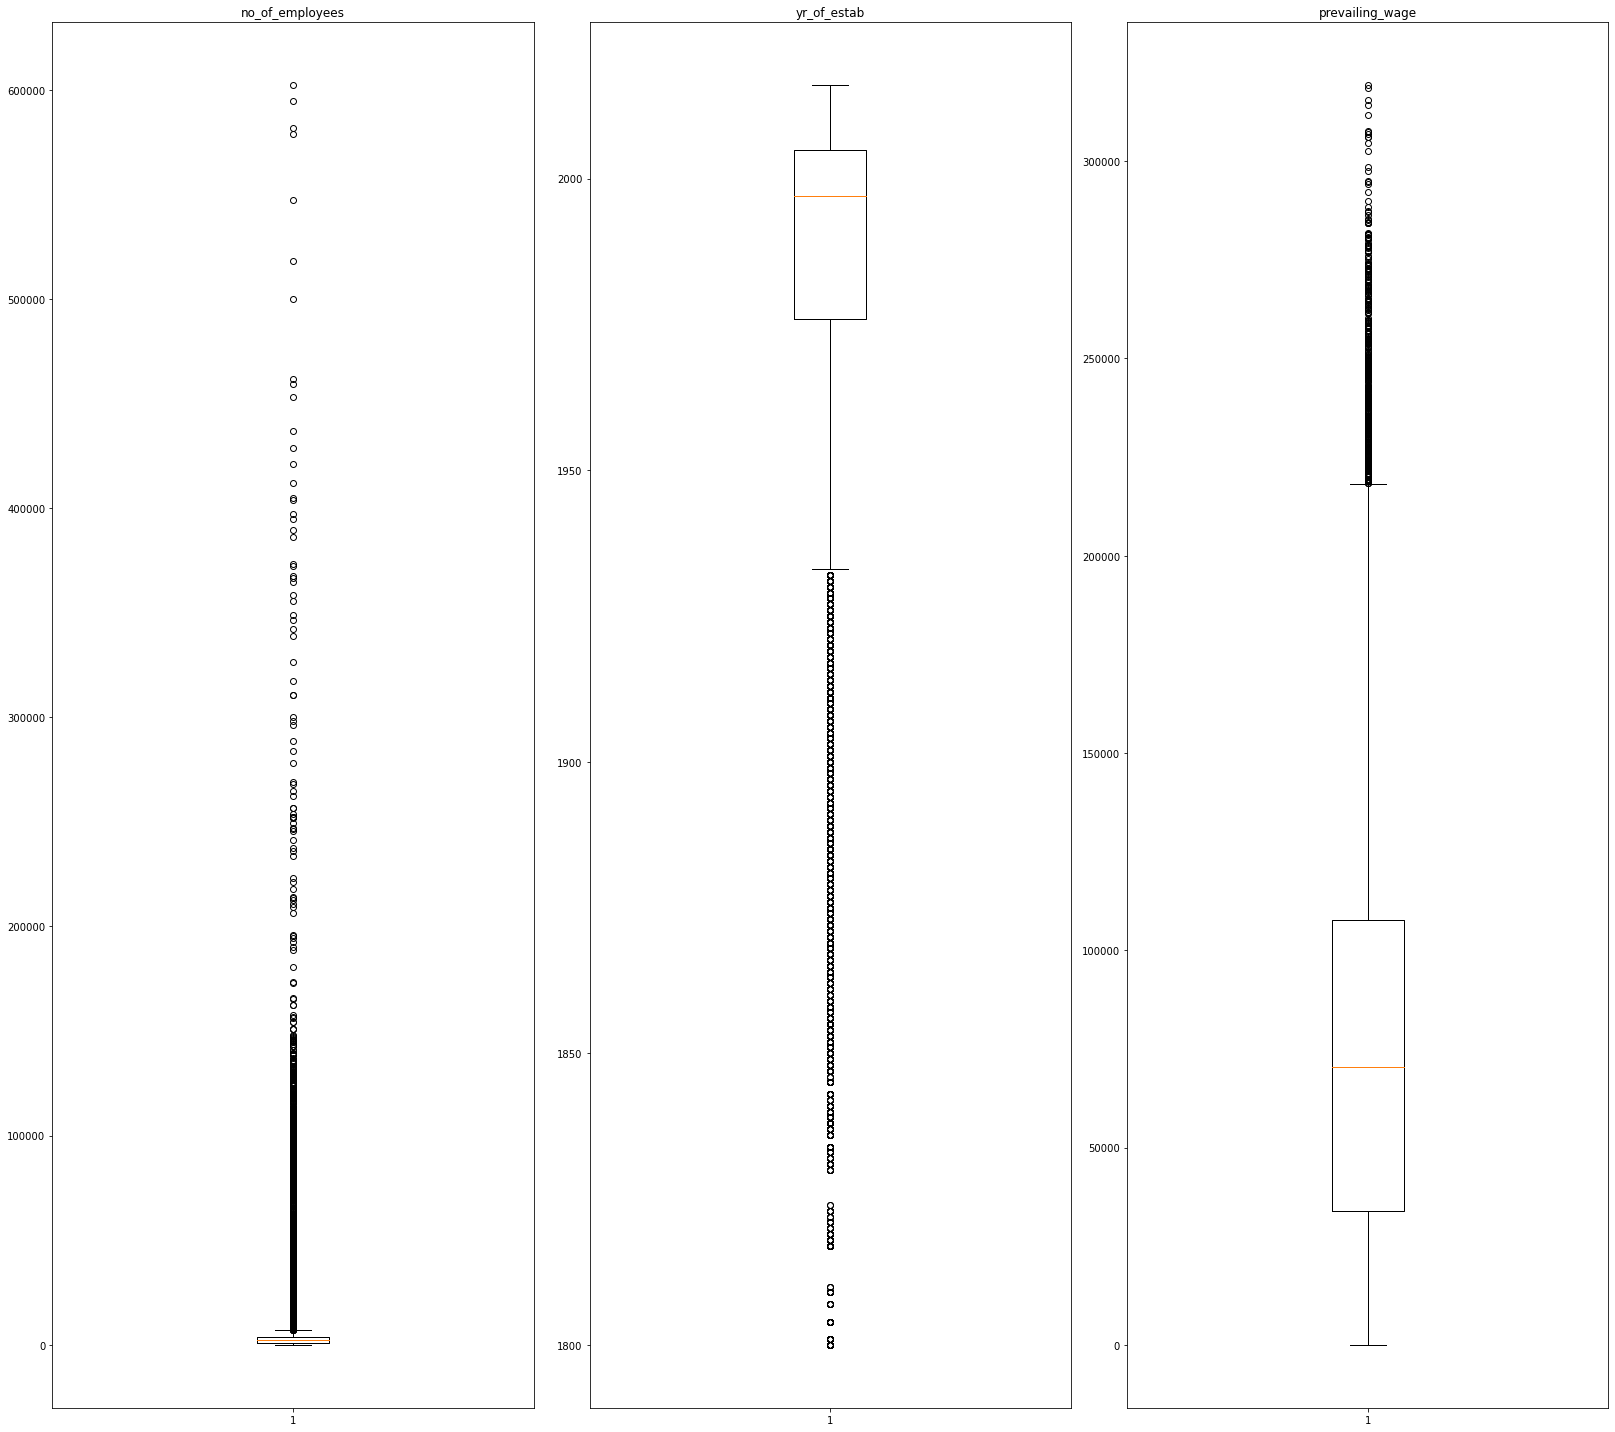

In [ ]:
# outlier detection using boxplot
numerical_col = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30, 20))


for i, variable in enumerate(numerical_col):
    plt.subplot(1, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Obseravtion:

* There are few outliers in the data
* We shall treat some of them

In [ ]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """

    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy

    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

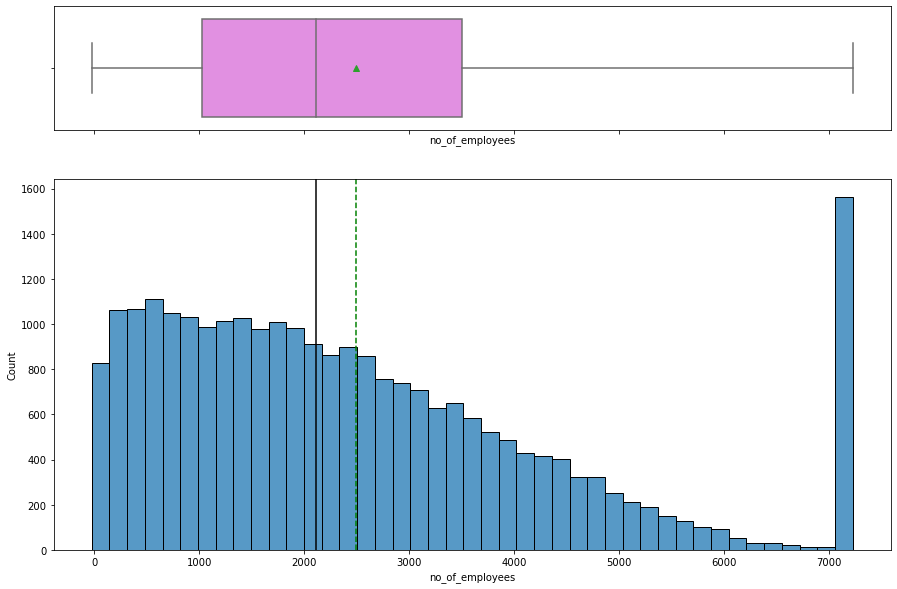

In [ ]:
df1 = treat_outliers(df1,'no_of_employees')

# visualizing the column after outlier treatment
histogram_boxplot(df1,'no_of_employees')

## EDA

- It is a good idea to explore the data once again after manipulating it.

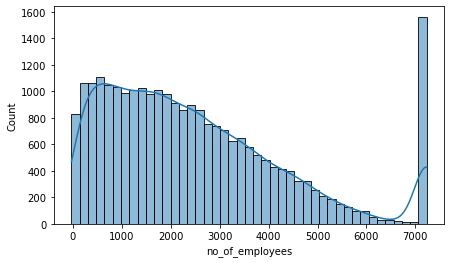

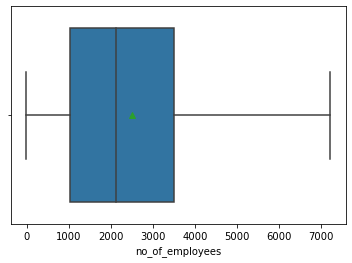

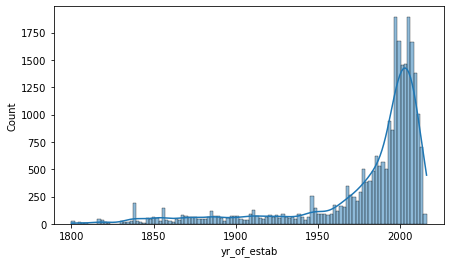

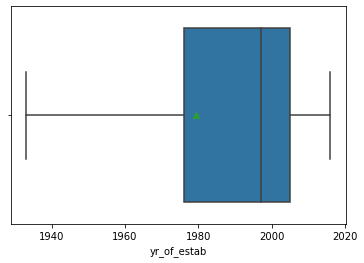

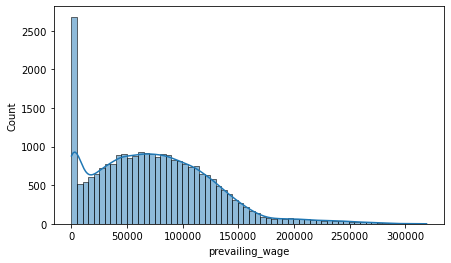

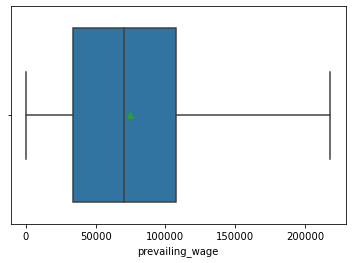

In [ ]:
for i in numerical_col:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df1, x=i,kde=True)
    plt.show()
    sns.boxplot(data=df1,x=i,showmeans=True,showfliers=False)
    plt.show()

Observation:

* No significant change of data after treatig outliers

### Feature engineering


In [ ]:
# Creating a new feature " years of operations "

df1['years_of_operation'] = 2022 - df1['yr_of_estab']
df1.drop(['yr_of_estab', 'case_id'], axis=1, inplace=True)

In [ ]:
df1['case_status'] = df1['case_status'].replace({'Certified': 1,
        'Denied': 0})

X = df1.drop(['case_status'], axis=1)
y = df1['case_status']

X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Splitting data into training and test set:

(X_train, X_test, y_train, y_test) = train_test_split(X, y,
        test_size=0.3, random_state=1, stratify=y)
print (X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


## Building bagging and boosting models

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics

    df_perf = pd.DataFrame({
        'Accuracy': acc,
        'Recall': recall,
        'Precision': precision,
        'F1': f1,
        }, index=[0])

    return df_perf


In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([['{0:0.0f}'.format(item)
                        + '\n{0:.2%}'.format(item
                        / cm.flatten().sum())] for item in
                        cm.flatten()]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Random Forest Model

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.722658  0.836435   0.768677  0.801126


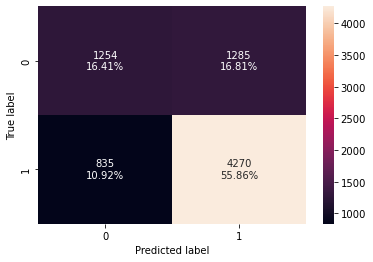

In [ ]:
# Fitting the model

rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics

rf_estimator_model_train_perf = \
    model_performance_classification_sklearn(rf_estimator, X_train,
        y_train)
print ('Training performance:\n', rf_estimator_model_train_perf)
rf_estimator_model_test_perf = \
    model_performance_classification_sklearn(rf_estimator, X_test,
        y_test)
print ('Testing performance:\n', rf_estimator_model_test_perf)

# Creating confusion matrix

confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
# Fitting the model

bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics

bagging_classifier_model_train_perf = \
    model_performance_classification_sklearn(bagging_classifier,
        X_train, y_train)
print ('Training performance:\n', bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = \
    model_performance_classification_sklearn(bagging_classifier,
        X_test, y_test)
print ('Testing performance:\n', bagging_classifier_model_test_perf)

# Creating confusion matrix

confusion_matrix_sklearn(bagging_classifier, X_test, y_test)


### Bagging Classifier Model

Training performance:
    Accuracy    Recall  Precision        F1
0  0.985535  0.986485   0.991814  0.989142
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.694139  0.768266   0.772503  0.770379


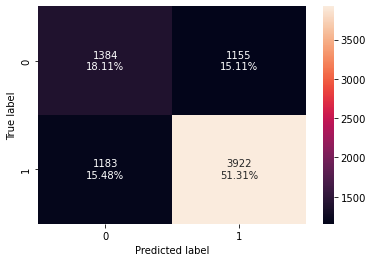

In [ ]:
# Fitting the model

bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics

bagging_classifier_model_train_perf = \
    model_performance_classification_sklearn(bagging_classifier,
        X_train, y_train)
print ('Training performance:\n', bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = \
    model_performance_classification_sklearn(bagging_classifier,
        X_test, y_test)
print ('Testing performance:\n', bagging_classifier_model_test_perf)

# Creating confusion matrix

confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

### AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.738506  0.887434   0.760849  0.819281
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733516  0.884035   0.757469  0.815873


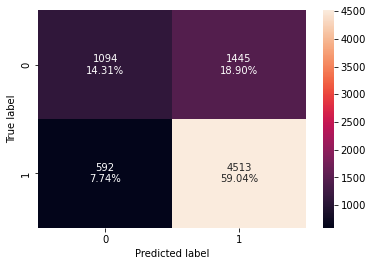

In [ ]:
# Fitting the model

ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics

ab_classifier_model_train_perf = \
    model_performance_classification_sklearn(ab_classifier, X_train,
        y_train)
print ('Training performance:\n', ab_classifier_model_train_perf)
ab_classifier_model_test_perf = \
    model_performance_classification_sklearn(ab_classifier, X_test,
        y_test)
print ('Testing performance:\n', ab_classifier_model_test_perf)

# Creating confusion matrix

confusion_matrix_sklearn(ab_classifier, X_test, y_test)

### Gradient Boosting Classifier


Training performance:
    Accuracy    Recall  Precision        F1
0  0.758298  0.882229   0.783276  0.829813
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745552  0.874829   0.773735  0.821182


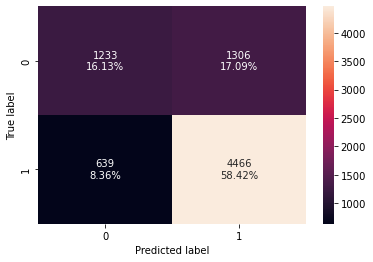

In [ ]:
# Fitting the model

gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics

gb_classifier_model_train_perf = \
    model_performance_classification_sklearn(gb_classifier, X_train,
        y_train)
print ('Training performance:\n', gb_classifier_model_train_perf)
gb_classifier_model_test_perf = \
    model_performance_classification_sklearn(gb_classifier, X_test,
        y_test)
print ('Testing performance:\n', gb_classifier_model_test_perf)

# Creating confusion matrix

confusion_matrix_sklearn(gb_classifier, X_test, y_test)

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.837688  0.929992   0.843151  0.884445
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.731947  0.856219    0.76873  0.81012


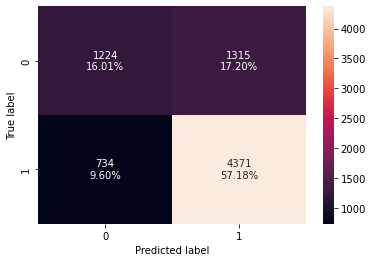

In [ ]:
# Fitting the model

xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics

xgb_classifier_model_train_perf = \
    model_performance_classification_sklearn(xgb_classifier, X_train,
        y_train)
print ('Training performance:\n', xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = \
    model_performance_classification_sklearn(xgb_classifier, X_test,
        y_test)
print ('Testing performance:\n', xgb_classifier_model_test_perf)

# Creating confusion matrix

confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

##  Will tuning the hyperparameters improve the model performance?

## Tuning Models

### Tuning Random Forest

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

parameters = {  
                #'max_depth': list(np.arange(3,10,1)),
                'class_weight': [None, 'balanced'],
                'max_features': [0.6,0.7,0.9],
                'max_samples': [0.5,0.1,0.7,0.9],
                #'min_samples_split': np.arange(2, 20, 5),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1],
                'n_estimators': [110,251,501,70],
                #'min_samples_leaf': np.arange(1, 6,1)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.1,
                       min_impurity_decrease=0.001, n_estimators=501,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.759531  0.880131   0.785629  0.830199
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.743721  0.86856   0.774904  0.819063


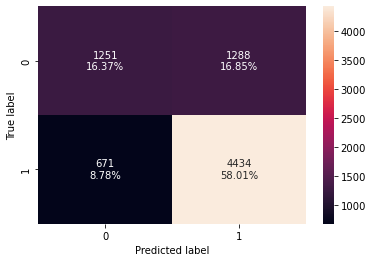

In [ ]:
# Calculating different metrics

rf_tuned_model_train_perf = \
    model_performance_classification_sklearn(rf_tuned, X_train, y_train)
print ('Training performance:\n', rf_tuned_model_train_perf)
rf_tuned_model_test_perf = \
    model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print ('Testing performance:\n', rf_tuned_model_test_perf)

# Creating confusion matrix

confusion_matrix_sklearn(rf_tuned, X_test, y_test)

### Tuning Bagging Classifier

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.995795  0.999664   0.994073  0.996861
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.724882  0.886386   0.748181  0.811441


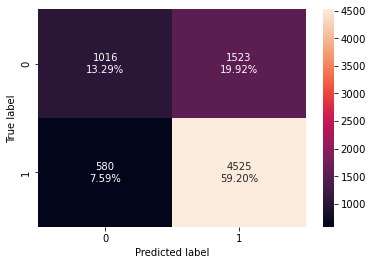

In [ ]:
# Calculating different metrics

bagging_estimator_tuned_model_train_perf = \
    model_performance_classification_sklearn(bagging_estimator_tuned,
        X_train, y_train)
print ('Training performance:\n',
       bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = \
    model_performance_classification_sklearn(bagging_estimator_tuned,
        X_test, y_test)
print ('Testing performance:\n',
       bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix

confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

### Tuning AdaBoosting

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=60, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.754205  0.883992   0.778172  0.827714
   Accuracy    Recall  Precision        F1
0  0.742674  0.877963    0.76931  0.820053


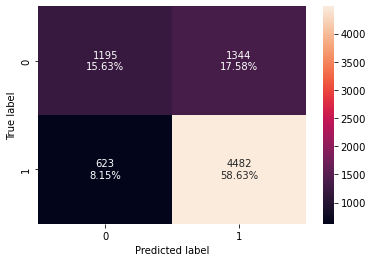

In [ ]:
# Calculating different metrics

abc_tuned_model_train_perf = \
    model_performance_classification_sklearn(abc_tuned, X_train,
        y_train)
print abc_tuned_model_train_perf
abc_tuned_model_test_perf = \
    model_performance_classification_sklearn(abc_tuned, X_test, y_test)
print abc_tuned_model_test_perf

# Creating confusion matrix

confusion_matrix_sklearn(abc_tuned, X_test, y_test)

### Tuning GradientBoostingClassifier

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    "max_depth":[3,5,7,10]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.8)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757289  0.882985   0.781849  0.829345
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.742543  0.872086   0.771978  0.818985


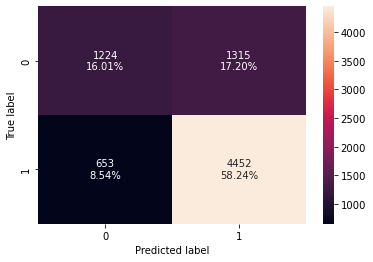

In [ ]:
# Calculating different metrics

gbc_tuned_model_train_perf = \
    model_performance_classification_sklearn(gbc_tuned, X_train,
        y_train)
print ('Training performance:\n', gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = \
    model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print ('Testing performance:\n', gbc_tuned_model_test_perf)

# Creating confusion matrix

confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

### Tuning XGBClassifier

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [75,100,125,150],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    #"colsample_bytree":[0.7,0.9,1],
    #"colsample_bylevel":[0.5,0.7,1],
    "gamma":[0, 1, 3, 5]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.76497  0.882985   0.789893  0.833849
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.747645  0.872478   0.777041  0.821999


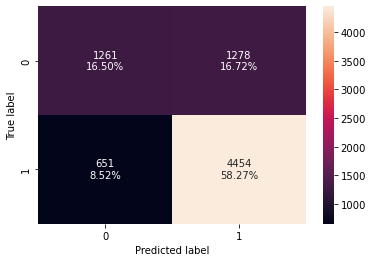

In [ ]:
# Calculating different metrics

xgb_tuned_model_train_perf = \
    model_performance_classification_sklearn(xgb_tuned, X_train,
        y_train)
print ('Training performance:\n', xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = \
    model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print ('Testing performance:\n', xgb_tuned_model_test_perf)

# Creating confusion matrix

confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned
Accuracy,1.0,0.759531,0.985535,0.995795,0.738506,0.754205,0.758298,0.757289,0.837688,0.764970
Recall,1.0,0.880131,0.986485,0.999664,0.887434,0.883992,0.882229,0.882985,0.929992,0.882985
Precision,1.0,0.785629,0.991814,0.994073,0.760849,0.778172,0.783276,0.781849,0.843151,0.789893
F1,1.0,0.830199,0.989142,0.996861,0.819281,0.827714,0.829813,0.829345,0.884445,0.833849


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned
Accuracy,0.722658,0.743721,0.694139,0.724882,0.733516,0.742674,0.745552,0.742543,0.731947,0.747645
Recall,0.836435,0.868560,0.768266,0.886386,0.884035,0.877963,0.874829,0.872086,0.856219,0.872478
Precision,0.768677,0.774904,0.772503,0.748181,0.757469,0.769310,0.773735,0.771978,0.768730,0.777041
F1,0.801126,0.819063,0.770379,0.811441,0.815873,0.820053,0.821182,0.818985,0.810120,0.821999


### Feature importance of XGBoost Classifier Tuned

In [ ]:
print (pd.DataFrame(xgb_tuned.feature_importances_, columns=['Imp'],
                   index=X_train.columns).sort_values(by='Imp',
        ascending=False))

                                        Imp
education_of_employee_High School  0.339027
has_job_experience_Y               0.121624
education_of_employee_Master's     0.071125
education_of_employee_Doctorate    0.064123
continent_Europe                   0.052648
unit_of_wage_Year                  0.050514
region_of_employment_Midwest       0.036832
region_of_employment_South         0.031148
region_of_employment_Northeast     0.030970
prevailing_wage                    0.026938
continent_Asia                     0.026224
region_of_employment_West          0.026168
full_time_position_Y               0.023143
continent_North America            0.020104
requires_job_training_Y            0.019787
continent_South America            0.017933
years_of_operation                 0.014406
no_of_employees                    0.014238
continent_Oceania                  0.013045
unit_of_wage_Month                 0.000000
unit_of_wage_Week                  0.000000


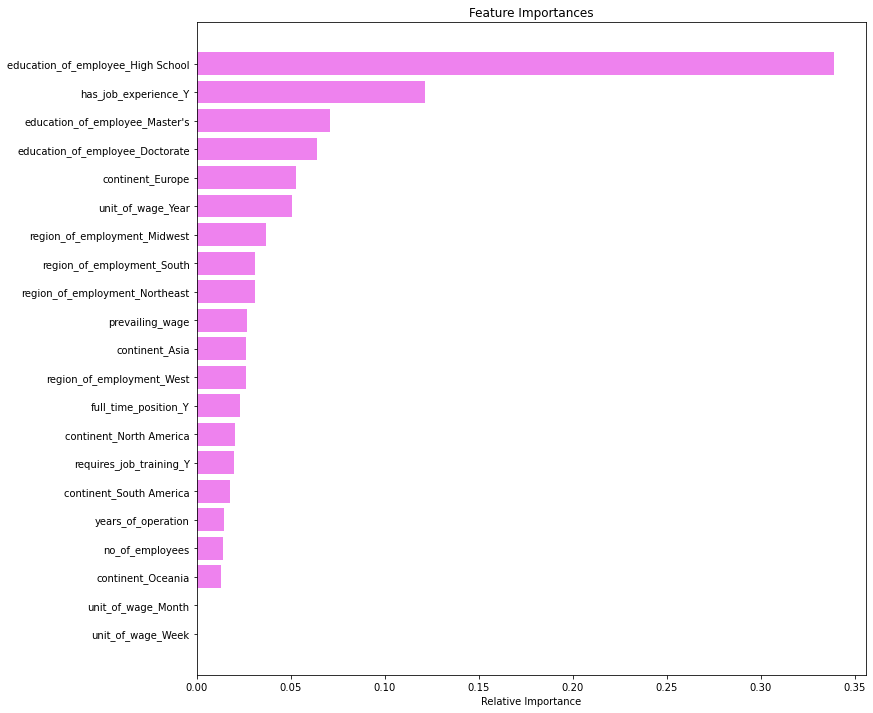

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet',
         align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observation:

* Education_of_employee_high_school is the most important feature followed by job experience and volatile Education_of_employee_high_master's.

## Actionable Insights and Recommendations


* Priority should be given to people that has higher education

* OFLC should focus more applicants from Europe and Africa as they have higher chance of getting a Visa

* OFLC should give priority to Applicants with job experience as they have higher chance of getting a Visa

* OFLC should prioritize applicants with jobs with year as unit of wage as they have higher chance of getting a visa

* OFLC should prioritize applicants with job prevailling wage of 70,000 and more

* OFLC should prioritize aoolication of jobs from Midwest and South as they have higher chance of getting a visa